# 1. K-Means Clustering

In [0]:
from sklearn.cluster import KMeans
#importing important libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import scipy
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import seaborn as sns
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, UpSampling2D, Activation, Input
from keras import backend as K
from sklearn.cluster import KMeans

In [0]:
#importing DataSet
from keras.datasets import fashion_mnist
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

In [0]:
#Reshaping the data so i.e making 3-dimensional data into 2 dimesnional 28X28 = 784
X_train= X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

In [51]:
#Checking the Shapes of each
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


In [0]:
#to make the data between 0 and 1
X_train=X_train/255
X_test=X_test/255

In [53]:
# Using KMeans having 10 clusters
model1 = KMeans(n_clusters=10,max_iter=500)
model1.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# Using the fitted model on Training data to predict on Testing data
model_pred=model1.predict(X_test)

In [55]:
#Checking the accuracy of our predicted data
print("Accuracy\n",(metrics.adjusted_mutual_info_score(Y_test, model_pred))*100,"%")

Accuracy
 50.48049584518258 %


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


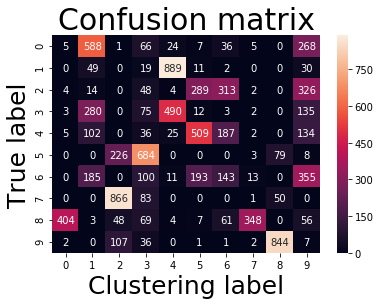

In [57]:
#Plotting Confusion Matrix
cm = confusion_matrix(Y_test, model_pred)
map1 = sns.heatmap(cm, annot=True, fmt='d') 
bottom, top = map1.get_ylim()
map1.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)

plt.show()


# 2.Auto-Encoder with K-Means clustering




In [0]:
# importing Fashion-MNIST datasets
from keras.datasets import fashion_mnist
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

In [0]:
#Splitting the training data in to Training and Validation
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size=0.25, stratify=Y_train, random_state=123)

In [0]:
#Noramlaizing the data between 0 and 1
X_train = X_train.reshape(-1,28,28,1) / 255
X_test = X_test.reshape(-1,28,28,1) / 255
X_validate = X_validate.reshape(-1,28,28,1) / 255

In [33]:
#Building the AutoEncoder with Convulational 2D model

input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPool2D((2, 2), padding='same')(x) #Here the encoding part ends

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x) #Here decoding part ends

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')


In [34]:
# Train the model
h=autoencoder.fit(X_train, X_train, epochs=25, batch_size=64, validation_data=(X_validate, X_validate), verbose=1)




Train on 45000 samples, validate on 15000 samples
Epoch 1/25





45000/45000 [==============================] - 74s 2ms/step - loss: 0.0359 - val_loss: 0.0205
Epoch 2/25
45000/45000 [==============================] - 74s 2ms/step - loss: 0.0190 - val_loss: 0.0183
Epoch 3/25
45000/45000 [==============================] - 74s 2ms/step - loss: 0.0174 - val_loss: 0.0169
Epoch 4/25
45000/45000 [==============================] - 74s 2ms/step - loss: 0.0165 - val_loss: 0.0169
Epoch 5/25
45000/45000 [==============================] - 74s 2ms/step - loss: 0.0159 - val_loss: 0.0156
Epoch 6/25
45000/45000 [==============================] - 74s 2ms/step - loss: 0.0154 - val_loss: 0.0153
Epoch 7/25
45000/45000 [==============================] - 74s 2ms/step - loss: 0.0151 - val_loss: 0.0150
Epoch 8/25
45000/45000 [==============================] - 74s 2ms/step - loss: 0.0148 - val_loss: 0.0147
Epoch 9/25
45000/45000 [==============================] - 74s 2ms/step - loss: 0.0145 - val_loss: 0.01

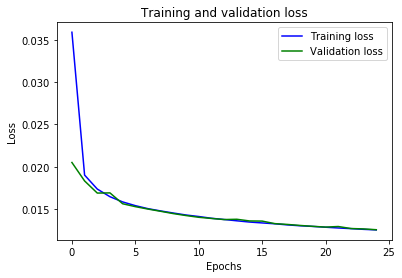

In [35]:
#Graph of loss vs epochs for training and validation
epochs=25
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, color='blue', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

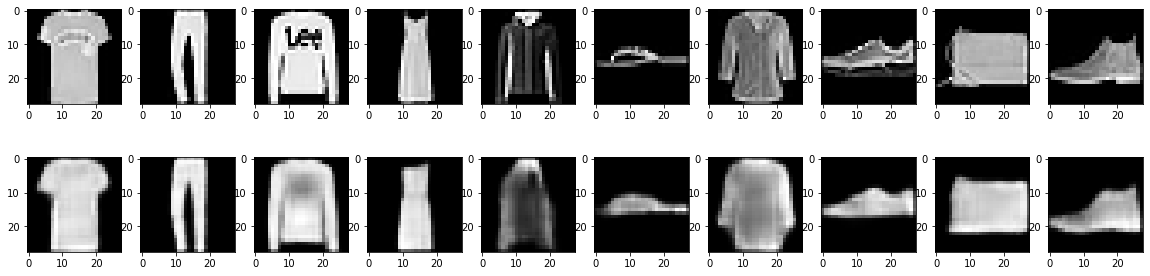

In [36]:
# AutoEncoder predicting on Test data
predict_test_from_auto_encoder = autoencoder.predict(X_test)
# Lets test the predicted data image quality from autoencoder 
plt.figure(figsize=(20,5))
for i in range(10):
    index = Y_test.tolist().index(i)
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[index].reshape((28,28)))
    plt.gray()
    plt.subplot(2, 10, i+11)
    plt.imshow(predict_test_from_auto_encoder[index].reshape((28,28)))
    plt.gray()

In [37]:
predict_test_from_auto_encoder.shape

(10000, 28, 28, 1)

In [0]:
# Extracting only encoder part from Autoencoder
onlyencoder=K.function([autoencoder.layers[0].input],[autoencoder.layers[6].output])

In [39]:
#Checking the shape of Encoder 
encoded.shape

TensorShape([Dimension(None), Dimension(4), Dimension(4), Dimension(8)])

In [0]:
#Encoding the training and testing data
encoded_data_train=onlyencoder([X_train])[0].reshape(-1,4*4*8)
encoded_data_test=onlyencoder([X_test])[0].reshape(-1,4*4*8)


In [0]:
# Fitting the encoded training data with kMeans and predicting the model on encoded testing data
kmeans = KMeans(n_clusters=10,max_iter=500)
kmeans.fit(encoded_data_train)
kmeans_pred=kmeans.predict(encoded_data_test)

In [42]:
# Accuracy of the model
print("Accuracy\n",(metrics.adjusted_mutual_info_score(Y_test, kmeans_pred))*100,"%")

Accuracy
 50.93280786980805 %


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


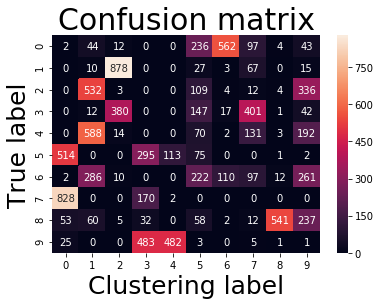

In [44]:
#Creating confusion matrix graph of K means
cm = confusion_matrix(Y_test, kmeans_pred)
map1 = sns.heatmap(cm, annot=True, fmt='d') 
bottom, top = map1.get_ylim()
map1.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

# 3.Auto-Encoder with GMM clustering


In [0]:
# Fitting the encoded training data with GMM and predicting the model on encoded testing data
gmm = GMM(n_components=10).fit(encoded_data_train)
gmm_predict = gmm.predict(encoded_data_test)

In [46]:
# Accuracy of the Gaussian Mixture Model with Auto-Encoder
print("Accuracy\n",(metrics.adjusted_mutual_info_score(Y_test, gmm_predict))*100,"%")

Accuracy
 55.289049889171714 %


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


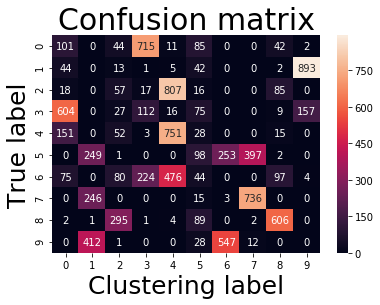

In [47]:
#Creating confusion matrix graph of Gaussian Mixture Model Autoencoder
cm = confusion_matrix(Y_test, gmm_predict)
map1 = sns.heatmap(cm, annot=True, fmt='d') 
bottom, top = map1.get_ylim()
map1.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()